# Importing Required Libraries

In [1]:
import os

# Preprocessing and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tools for training model
import tensorflow as tf
from tensorflow.keras.applications import resnet50

#Tools for evaluation of model
from sklearn.metrics import classification_report, confusion_matrix

# # Get dataset from GCS
# from kaggle_datasets import KaggleDatasets                    # Uncomment to run on kaggle

# Setting Environment For Distributed Training On Kaggle TPU

In [2]:
os.environ

environ({'COLAB_TPU_ADDR': '10.125.15.66:8470', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20210929', 'JPY_PARENT_PID': '52', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GL

In [3]:
try:
    #tpu_address = os.environ['TPU_NAME']                                        # For running notebook on Kaggle notebook
    tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']                      # For running notebook on Colab
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)

    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    print('Running on TPU: ', tpu.cluster_spec().as_dict()['worker'])
    print('Number of accelerators: ', strategy.num_replicas_in_sync)

except ValueError:
    print('TPU failed to initialize.')

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.125.15.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.125.15.66:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU:  ['10.125.15.66:8470']
Number of accelerators:  8


# Loading Data as Tensorflow Dataset

### TPUs on Kaggle deny to load dataset on local device, rather accept data stored in Google Cloud Storage.
### GCS PATH of a public dataset on Kaggle can be obtained by running the code below in Kaggle Notebook opened using a dataset.

### GCS_PATH = KaggleDatasets().get_gcs_path()

In [53]:

# Since this notebook is run using Colab, GCS_PATH is assigned manually.

GCS_PATH = 'gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4'
print(GCS_PATH)

gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4


In [54]:
!gsutil ls $GCS_PATH

gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4/README.txt
gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4/Segmentation_example_script.m
gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4/license.txt
gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4/Fish_Dataset/
gs://kds-ee14c61b7100d645bfa7911457bcaf6c5e92a049669e63b42178d8a4/NA_Fish_Dataset/


In [55]:
# train_path = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/*/*/*'
# test_path = '../input/a-large-scale-fish-dataset/NA_Fish_Dataset/*/*'

train_path = GCS_PATH + '/Fish_Dataset/Fish_Dataset/*/*/*'

In [56]:
# Define constants
IMG_SIZE = [224, 224]
BATCH_SIZE = 128
VAL_SPLIT = 0.2
BUFFER_SIZE = 1024
CLASSES = ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']

In [57]:
# Training And Validation Data
def get_class(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]


def get_label(file_path):
    img_class = get_class(file_path)
    all_classes = ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
    label = tf.convert_to_tensor(list(map((lambda x: int(x == img_class)), all_classes)))
    return label

def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img, label


def load_dataset(file_path):
    image_dataset = tf.data.Dataset.list_files(file_path, shuffle = True)
    split = int(len(image_dataset) * VAL_SPLIT)

    valid_dataset = image_dataset.take(split)
    train_dataset = image_dataset.skip(split)

    train_dataset = train_dataset.filter(lambda x: tf.strings.split(get_class(x), ' ')[-1] != 'GT')
    train_dataset = train_dataset.map(process_image)

    valid_dataset = valid_dataset.filter(lambda x: tf.strings.split(get_class(x), ' ')[-1] != 'GT')
    valid_dataset = valid_dataset.map(process_image)
    return train_dataset, valid_dataset


def get_batched_dataset(dataset):
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder = False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    dataset = dataset.cache()    
    return dataset


def get_train_val_data(file_path):
    dataset = load_dataset(file_path)
    train = get_batched_dataset(dataset[0])
    val = get_batched_dataset(dataset[1])
    return train, val

In [19]:
# train, test = load_dataset(train_path)

In [20]:
# img = None
# label = None
# for image, lab in train.take(1):
#     img = image
#     label = lab

# plt.imshow(image.numpy())

# print(label)

In [58]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()

        self.base_block = resnet50.ResNet50()

        self.base_block = tf.keras.models.Model(
            inputs = self.base_block.input,
            outputs = self.base_block.layers[-2].output            
        )

        for layer in self.base_block.layers[:140]:
            layer.trainable = False

        self._dense1 = tf.keras.layers.Dense(128, activation='relu')
        self._dense2 = tf.keras.layers.Dense(64, activation='relu')
        self._dense3 = tf.keras.layers.Dense(32, activation='relu')
        self._dense4 = tf.keras.layers.Dense(16, activation='relu')
        self._classifier = tf.keras.layers.Dense(9, activation='softmax')

    def call(self, inputs):

        base_output = self.base_block(inputs)

        x = self._dense1(base_output)
        x = self._dense2(x)
        x = self._dense3(x)
        x = self._dense4(x)

        x = self._classifier(x)

        return x

In [59]:
train_data, valid_data = get_train_val_data(train_path)

In [60]:
images = None
labels = None
for img, label in train_data.take(1):
    images = img
    labels = label

In [61]:
labels.numpy().shape

(128, 9)

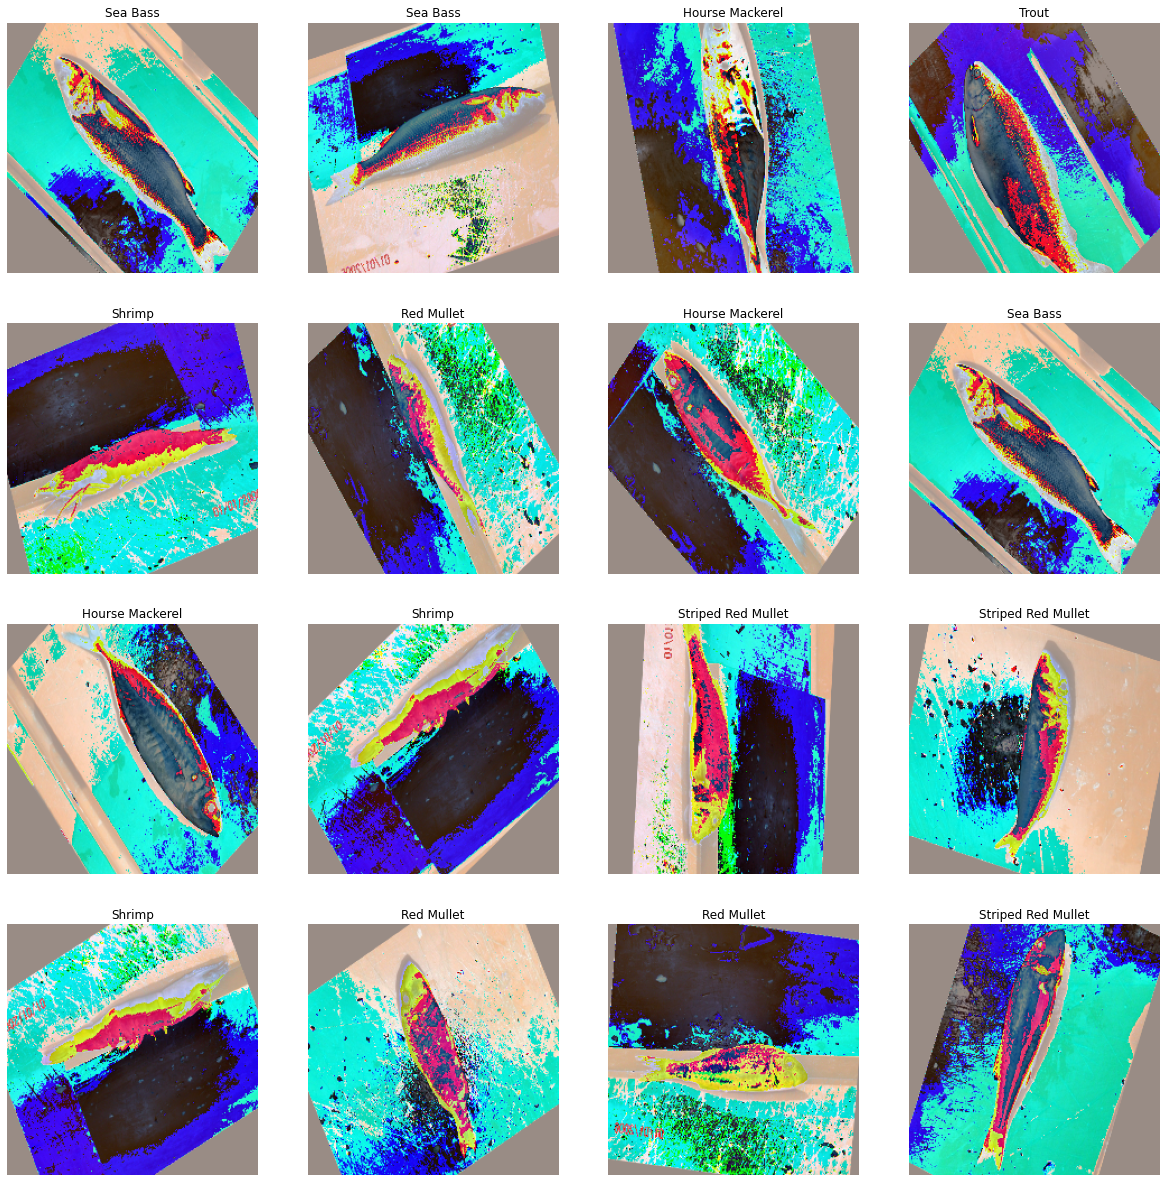

In [35]:
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
axarr = axes.flat

for i, axis in enumerate(axarr):
  axis.imshow(images.numpy()[i, :, :, :])
  axis.set_title(CLASSES[np.argmax(labels.numpy()[i])])
  axis.axis('off')



plt.subplots_adjust(
    left=0.1,
    bottom = 0.1,
    right=0.9,
    top = 0.9,
    wspace=0.2,
    hspace = 0.2    
)

# Model Training

In [49]:
with strategy.scope():

    model = MyModel()

    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        reduction = tf.keras.losses.Reduction.NONE
    )

    def compute_loss(labels, predictions):
        per_example_loss = loss_object(labels, predictions)
        return tf.nn.compute_average_loss(per_example_loss, global_batch_size = BATCH_SIZE * strategy.num_replicas_in_sync)

    test_loss = tf.keras.metrics.Mean(name = 'test_loss')

    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

    optimizer = tf.keras.optimizers.Adam()

    @tf.function
    def distributed_training_step(datasets_inputs):
        per_replica_losses = strategy.run(train_steps, args = (datasets_inputs, ))
        print(per_replica_losses)
        return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis = None)

    @tf.function
    def distributed_test_step(datasets_inputs):
        strategy.run(test_steps, args = (datasets_inputs, ))

    def train_steps(inputs):
        images, labels = inputs

        with tf.GradientTape() as tape:
            predictions = model(images)

            loss = compute_loss(labels, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_accuracy.update_state(labels, predictions)

        return loss

    def test_steps(inputs):
        images, labels = inputs

        predictions = model(images)
        loss = loss_object(labels, predictions)

        test_loss.update_state(loss)
        test_accuracy.update_state(labels, predictions)

In [50]:
EPOCHS = 1
with strategy.scope():
    for epoch in range(EPOCHS):

        total_loss = 0.0
        num_batches = 0

        # Training Loop
        for x in train_data: 
            total_loss += distributed_training_step(x)
            num_batches += 1

        train_loss = total_loss / num_batches

        # Testing Loop
        for x in valid_data:
            distributed_test_step(x)
        
        template = ("Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Test Loss: {:.2f}, Test Accuracy: {:.2f}")

        print(template.format(
            epoch + 1,
            train_loss,
            train_accuracy.result() * 100,
            test_loss.result() / strategy.num_replicas_in_sync,
            test_accuracy.result() * 100
        ))

        test_loss.reset_states()
        train_accuracy.reset_states()
        test_accuracy.reset_states()

        

ValueError: ignored